<a href="https://colab.research.google.com/github/dennkitotaichi/CE_PLUS/blob/patch-1/light_GBM_sirinnji9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import files
uploaded = files.upload()

Saving testTotal2019i.csv to testTotal2019i.csv


     Unnamed: 0  total  ...  Total snowfall (cm)  Total snowfall (cm).1
0      2016/9/1    165  ...                    0                      1
1      2016/9/2    161  ...                    0                      1
2      2016/9/3    156  ...                    0                      1
3      2016/9/4    156  ...                    0                      1
4      2016/9/5    171  ...                    0                      1
...         ...    ...  ...                  ...                    ...
1090  2019/8/27    113  ...                    0                      1
1091  2019/8/28    119  ...                    0                      1
1092  2019/8/29    123  ...                    0                      1
1093  2019/8/30    122  ...                    0                      1
1094  2019/8/31    107  ...                    0                      1

[1095 rows x 37 columns]
     Unnamed: 0  total  ...  Total snowfall (cm)  Total snowfall (cm).1
0      2016/9/1    165  ...           

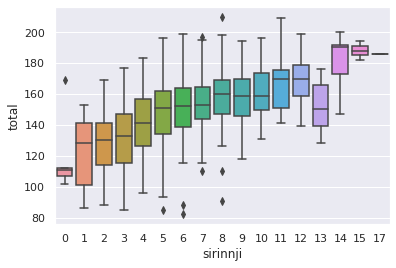

In [25]:
import pandas as pd

dt = pd.read_csv('testTotal2019i.csv')
print(dt)
df = pd.DataFrame(dt)
print(df)
print(df.columns)
print(df.columns[[0]])
print(df.drop(df.columns[[0]], axis=1))
dtt=df.drop(df.columns[[0]], axis=1)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
sns.set()
import collections
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras import layers
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from keras import regularizers
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
sns.boxplot(x="sirinnji", y="total", data=dtt)

import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import r2_score

import random

from pandas.plotting import scatter_matrix



                        Name  Coefficients
24                    M1-AM1 -1.000000e+00
15                 $B1-L1-M1 -1.000000e+00
13                 $B1-J1-K1 -5.075148e-01
11                 $B1-F1-G1 -3.384971e-01
3                   kokyuuki -2.554271e-01
17                     t-tei -2.518349e-01
20                    E1-AE1 -8.400803e-02
7                     elseOP -8.119395e-02
9                total-teiki -8.041580e-02
2                      woman -1.795301e-02
12                 $B1-I1-J1 -1.795301e-02
33       Total snowfall (cm) -2.909999e-16
32         Deepest Snow (cm) -1.488692e-18
30  Total precipitation (mm)  1.972050e-16
34     Total snowfall (cm).1  2.076162e-16
31    Daylight Hours (Hours)  2.653192e-16
29      sagyouhoukokusyoribi  3.548177e-16
27           sagyouhoukokubi  4.109564e-16
28     sagyouhoukokuhakkoubi  5.755444e-16
16                 $B1-O1-P1  7.781543e-04
10                 $B1-E1-F1  2.371984e-03
21                    G1-AG1  2.517011e-02
18         

,importance
0,1254
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


ここまで特徴量評価------------------------------------------------------------
予測対象Xs： [4. 4. 3. 3. 5. 5. 5.] , 予測結果→ [4.3411065  3.9648498  3.9648498  5.40837701 5.79564907 3.81093057
 4.3411065 ]
平均絶対誤差 (MAE, Mean Absolute Error
0.9132993578882689
二乗平均平方根誤差（RMSE） : 1.154
test_r2_score
-0.9208593622663355


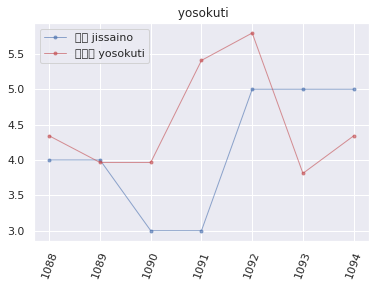

決定木accuracy_score : 0.14285714285714285
平均絶対誤差 (MAE, Mean Absolute Error
1.2857142857142858
二乗平均平方根誤差（RMSE） : 1.558
test_r2_score
-2.5000000000000004
ランダムフォレストaccuracy_score : 0.0
二乗平均平方根誤差（RMSE） : 1.464
test_r2_score
-2.088235294117647
XGBoost accuracy_score : 0.0
二乗平均平方根誤差（RMSE） : 1.604
test_r2_score
-2.7058823529411766
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


,DT,RF,XGB
0,1.0,1.0,1.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,0.0,0.0
6,0.0,0.0,0.0
7,0.0,0.0,0.0
8,0.0,0.0,0.0
9,0.0,0.0,0.0


In [35]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

# 説明変数に "sirinnji(sirinnjiスコア以外すべて)" を利用
wine_except_quality = dtt.drop('sirinnji', axis=1)
X = wine_except_quality.values
 
# 目的変数に "sirinnji" を利用
Y = dtt['sirinnji'].values
 
# 予測モデルを作成
clf.fit(X, Y)
 
# 偏回帰係数
print(pd.DataFrame({"Name":wine_except_quality.columns,
                    "Coefficients":clf.coef_}).sort_values(by='Coefficients') )
 
# 切片 (誤差)
print(clf.intercept_)

print("------------------------------------------------------------")
 
# データフレームの各列を正規化
wine2 = dtt.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
wine2.head()
 
# 説明変数に "quality (kokyuukiスコア以外すべて)" を利用
wine2_except_quality = wine2.drop('sirinnji', axis=1)
X = wine2_except_quality.values

# 目的変数に "quality (品質スコア)" を利用
Y = df['sirinnji'].values
 
# 予測モデルを作成
clf.fit(X, Y)
 
# 偏回帰係数
print(pd.DataFrame({"Name":wine2_except_quality.columns,
                   "Coefficients":np.abs(clf.coef_)}).sort_values(by='Coefficients') )
 
# 切片 (誤差)
print(clf.intercept_)

print("------------------------------------------------------------")


print("------------------------------------------------------------")


print(dtt.shape)
df.describe()

print("------------------------------------------------------------")

#説明変数入力用
p1 = df['total-teiki'].values



#正規化後説明変数入力用
s1 = wine2['$B1-K1-L1'].values
s2 = wine2['$B1-L1-M1'].values
s3 = wine2['K1-AK1'].values
s4 = wine2['M1-AM1'].values
s5 = wine2['$B1-J1-K1'].values
s6 = wine2['C1-T1'].values
s7 = wine2['O1-AO1'].values
s8 = wine2['$B1-I1-J1'].values
s9 = wine2['elseOP'].values
s10 = wine2['sinndennzu'].values



#以前の残り
kaifukuOP = df['woman'].values
kaifukuOP2 = preprocessing.minmax_scale(kaifukuOP)

youso3 = df['man'].values
youso3seikika = preprocessing.minmax_scale(kaifukuOP)

#説明変数作成
sika=np.array([s1,p1,s2,s3])
si=sika.T
X=si
print("X")
print(X)
print("X.shape")
print(X.shape)

targetk = df['sirinnji'].values
siY=targetk.T
Y=siY

print(Y.shape)

# 訓練用のデータと、テスト用のデータに分ける
N_train = int(len(df) * 0.992)
N_test = len(df) - N_train
X_train, X_test, y_train, y_test = \
    train_test_split(X, Y, test_size=N_test, shuffle = False) 

print("------------------------------------------------------------")

## 当日のシリンジポンプを予測するために必要な過去の日数
lookback = 10

## 訓練・検証・テスト用データを作成
## 過去30日分の当日のシリンジポンプ評価台数より当日のシリンジポンプ評価台数とする
def data_split(data,start,end,lookback,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10):
    length = abs(start-end)
    Xs = np.zeros((length, lookback))
    ys = np.zeros(length)
    
    for i in range(length):
        j = start - lookback + i
        k = j + lookback  
        Xs[i] = h1[k]
        Xs[:,[1]]=h2[k]
        Xs[:,[2]]=h3[k]
        Xs[:,[3]]=h4[k]
        Xs[:,[4]]=h5[k]
        Xs[:,[5]]=h6[k]
        Xs[:,[6]]=h7[k]
        Xs[:,[7]]=h8[k]
        Xs[:,[8]]=h9[k]
        Xs[:,[9]]=h10[k]
        #Xs[:,[10]]=h11[k]

        ys[i] = targetk[k]

    return Xs, ys

print("------------------------------------------------------------")

## 訓練・検証・テスト用データ
(Xs_train, ys_train) = data_split(dtt, -700, -160, lookback,s1,s2,s3,s4,s5,s6,s7,s8,s9,p1)
(Xs_valid, ys_valid) = data_split(dtt, -160, -8, lookback,s1,s2,s3,s4,s5,s6,s7,s8,s9,p1)
(Xs_test, ys_test) = data_split(dtt, -7, 0, lookback,s1,s2,s3,s4,s5,s6,s7,s8,s9,p1)

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm  
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from sklearn.metrics import r2_score


print("ここから特徴量評価------------------------------------------------------------")
import lightgbm as lgb

# データを格納する
lgb_train = lgb.Dataset(Xs_train, ys_train)
lgb_eval = lgb.Dataset(Xs_test, ys_test, reference=lgb_train)
# 学習条件を設定
params = {'task': 'train',
          'metric':{'l2'},
          'boosting_type': 'gbdt',
          'learning_rate': 0.02,
          'num_leaves': 23,
          'min_data_in_leaf': 1,
          'num_iteration': 1000,
          'verbose': 0
          
          
          }


# 学習する
model = lgb.train(params,
                  lgb_train,
                  num_boost_round=50,
                  valid_sets=lgb_eval,
                  early_stopping_rounds=100)

# テストデータで予測する
y_pred = model.predict(Xs_test, num_iteration=model.best_iteration)
y_pred_max = np.argmax(y_pred)

# Accuracy を計算する
accuracy = sum(ys_test == y_pred_max) / len(ys_test)
print('accuracy:', accuracy)

# importanceを表示する
importance = pd.DataFrame(model.feature_importance(), columns=['importance'])
display(importance)


print("ここまで特徴量評価------------------------------------------------------------")


# テストデータによる予測,lightgbmでX_testを予想：predictした値をY_predとする
Y_pred = model.predict(Xs_test)

# テスト結果を評価する,accuracy_score()
print("予測対象Xs：", ys_test, ", 予測結果→", Y_pred)

from sklearn.metrics import mean_absolute_error
print("平均絶対誤差 (MAE, Mean Absolute Error") 
print(mean_absolute_error(ys_test, Y_pred))

## RMSEの計算
print("二乗平均平方根誤差（RMSE） : %.3f" %  
       np.sqrt(mean_squared_error(ys_test,Y_pred)))

## test_r2_score計算
test_r2_score = r2_score(ys_test,Y_pred)
print("test_r2_score")
print(test_r2_score)

## 予測結果をプロット
pre_date = df.index[-len(ys_test):].values
plt.title(" yosokuti")
plt.plot(pre_date, ys_test, 'b', alpha=0.6, marker='.', label="実際 jissaino  ", linewidth=1)
plt.plot(pre_date, Y_pred, 'r', alpha=0.6, marker='.', label="予測値 yosokuti", linewidth=1)
plt.xticks(rotation=70)
plt.legend()
plt.grid(True)
plt.show()





#決定木
from sklearn.tree import DecisionTreeClassifier
 
dt = DecisionTreeClassifier(random_state=2019)
dt.fit(Xs_train,ys_train)
y_pred = dt.predict(Xs_test)
print("決定木accuracy_score : {}".format(accuracy_score(ys_test,y_pred)))
 

from sklearn.metrics import mean_absolute_error
print("平均絶対誤差 (MAE, Mean Absolute Error") 
print(mean_absolute_error(ys_test, y_pred))

## RMSEの計算
print("二乗平均平方根誤差（RMSE） : %.3f" %  
       np.sqrt(mean_squared_error(ys_test,y_pred)))

## test_r2_score計算
test_r2_score = r2_score(ys_test,y_pred)
print("test_r2_score")
print(test_r2_score)


 
#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
 
rf = RandomForestClassifier(random_state=2019)
rf.fit(Xs_train,ys_train)
y_pred = rf.predict(Xs_test)
print("ランダムフォレストaccuracy_score : {}".format(accuracy_score(ys_test,y_pred)))
 
## RMSEの計算
print("二乗平均平方根誤差（RMSE） : %.3f" %  
       np.sqrt(mean_squared_error(ys_test,y_pred)))

## test_r2_score計算
test_r2_score = r2_score(ys_test,y_pred)
print("test_r2_score")
print(test_r2_score)



#XGBoost
import xgboost as xgb
from xgboost import XGBClassifier
 
xgb = xgb.XGBClassifier(booster="gbtree",silent=0,seed=2019)
xgb.fit(Xs_train,ys_train)
y_pred = xgb.predict(Xs_test)
print("XGBoost accuracy_score : {}".format(accuracy_score(ys_test,y_pred)))

## RMSEの計算
print("二乗平均平方根誤差（RMSE） : %.3f" %  
       np.sqrt(mean_squared_error(ys_test,y_pred)))

## test_r2_score計算
test_r2_score = r2_score(ys_test,y_pred)
print("test_r2_score")
print(test_r2_score)

#XGBoostの特徴量重要度を見る
print(xgb.feature_importances_)
 

 
#3つのモデルの特徴量重要度を並べてみる
models = ["DT","RF","XGB"]
importances = pd.DataFrame({
                            models[0]:dt.feature_importances_,
                            models[1]:rf.feature_importances_,
                            models[2]:xgb.feature_importances_})
 
#データフレームをDTの降順に並び替えて表示
importances.sort_values("DT",ascending=False)

------------------------------------------------------------
X
[[-5.80560992e-02  1.65000000e+02  1.39324201e-01  1.37735445e-01]
 [-5.80560992e-02  1.61000000e+02  9.93242009e-02  1.06485445e-01]
 [-5.80560992e-02  1.55000000e+02  6.73242009e-02  5.96104452e-02]
 ...
 [-3.43770385e-01  1.23000000e+02 -2.20675799e-01 -1.90389555e-01]
 [-2.00913242e-01  1.20000000e+02 -2.28675799e-01 -2.13827055e-01]
 [-2.00913242e-01  1.07000000e+02 -3.32675799e-01 -3.15389555e-01]]
X.shape
(1095, 4)
(1095,)
------------------------------------------------------------
------------------------------------------------------------
ここから特徴量評価------------------------------------------------------------
[1]	valid_0's l2: 3.11083
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 2.69422
[3]	valid_0's l2: 2.29448
[4]	valid_0's l2: 2.01154
[5]	valid_0's l2: 1.77563
[6]	valid_0's l2: 1.57881
[7]	valid_0's l2: 1.41449
[8]	valid_0's l2: 1.27849
[9]	valid_0's l2: 1.15637
[10]	valid_0's

,importance
0,84
1,0
2,0
3,0
4,0
5,0
6,0


ここまで特徴量評価------------------------------------------------------------
予測対象Xs： [4. 4. 3. 3. 5. 5. 5.] , 予測結果→ [3.96205207 3.96205207 3.96205207 4.62555283 5.47370698 4.88759942
 3.96205207]
平均絶対誤差 (MAE, Mean Absolute Error
0.6125080356946793
二乗平均平方根誤差（RMSE） : 0.835
test_r2_score
-0.005779431202258767


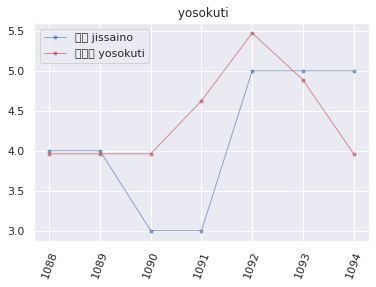

In [19]:


print("------------------------------------------------------------")

#説明変数入力用
p1 = df['total-teiki'].values
p2 = df['R1-AR1'].values
p3 = df['sinndennzu'].values
p4 = df['fukukuukyou'].values
p5 = df['man'].values

#正規化後説明変数入力用
s1 = wine2['kokyuuki'].values
s2 = wine2['total-e'].values
s3 = wine2['total-teiki'].values
s4 = wine2['total-man-kaikyouOP'].values
s5 = wine2['woman'].values
s6 = wine2['man'].values
s7 = wine2['teikitennkenn'].values
s8 = wine2['kaikyouOP'].values
s9 = wine2['elseOP'].values
s10 = wine2['sinndennzu'].values

#以前の残り
kaifukuOP = df['woman'].values
kaifukuOP2 = preprocessing.minmax_scale(kaifukuOP)

youso3 = df['man'].values
youso3seikika = preprocessing.minmax_scale(kaifukuOP)

#説明変数作成
sika=np.array([s1,p1,s2,s3])
si=sika.T
X=si
print("X")
print(X)
print("X.shape")
print(X.shape)


targetk = df['sirinnji'].values
siY=targetk.T
Y=siY

print(Y.shape)

# 訓練用のデータと、テスト用のデータに分ける
N_train = int(len(df) * 0.992)
N_test = len(df) - N_train
X_train, X_test, y_train, y_test = \
    train_test_split(X, Y, test_size=N_test, shuffle = False) 

print("------------------------------------------------------------")

## 当日のシリンジポンプを予測するために必要な過去の日数
lookback = 7

## 訓練・検証・テスト用データを作成
## 過去30日分の当日のシリンジポンプ評価台数より当日のシリンジポンプ評価台数とする
def data_split(data,start,end,lookback,h1,h2,h3,h4,h5):
    length = abs(start-end)
    Xs = np.zeros((length, lookback))
    ys = np.zeros(length)
    
    for i in range(length):
        j = start - lookback + i
        k = j + lookback  
        Xs[i] = h1[k]
        Xs[:,[1]]=h2[k]
        Xs[:,[2]]=h3[k]
        Xs[:,[3]]=h4[k]
        Xs[:,[4]]=h5[k]
        #Xs[:,[5]]=h6[k]
        #Xs[:,[6]]=h7[k]
        #Xs[:,[7]]=h8[k]
        #Xs[:,[8]]=h9[k]
        #Xs[:,[9]]=h10[k]
        #Xs[:,[10]]=h11[k]

        ys[i] = targetk[k]

    return Xs, ys

print("------------------------------------------------------------")

## 訓練・検証・テスト用データ
(Xs_train, ys_train) = data_split(dtt, -700, -160, lookback,p1,p2,p3,p4,p5)
(Xs_valid, ys_valid) = data_split(dtt, -160, -9, lookback,p1,p2,p3,p4,p5)
(Xs_test, ys_test) = data_split(dtt, -7, 0, lookback,p1,p2,p3,p4,p5)

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm  
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from sklearn.metrics import r2_score


print("ここから特徴量評価------------------------------------------------------------")
import lightgbm as lgb

# データを格納する
lgb_train = lgb.Dataset(Xs_train, ys_train)
lgb_eval = lgb.Dataset(Xs_test, ys_test, reference=lgb_train)
# 学習条件を設定
params = {'task': 'train',
          'metric':{'l2'},
          'boosting_type': 'gbdt',
          'learning_rate': 0.02,
          'num_leaves': 5,
          'min_data_in_leaf': 9,
          'num_iteration': 1000,
          'verbose': 0,
   'max_depth':-1,
   'max_bin':80,
   'n_estimators':8,
   'learning_rate': 0.09,
   'num_iterations': 200,
   'bagging_fraction':1.0
          }


# 学習する
model = lgb.train(params,
                  lgb_train,
                  num_boost_round=500,
                  valid_sets=lgb_eval,
                  early_stopping_rounds=100)

# テストデータで予測する
y_pred = model.predict(Xs_test, num_iteration=model.best_iteration)
y_pred_max = np.argmax(y_pred)

# Accuracy を計算する
accuracy = sum(ys_test == y_pred_max) / len(ys_test)
print('accuracy:', accuracy)

# importanceを表示する
importance = pd.DataFrame(model.feature_importance(), columns=['importance'])
display(importance)


print("ここまで特徴量評価------------------------------------------------------------")


# テストデータによる予測,lightgbmでX_testを予想：predictした値をY_predとする
Y_pred = model.predict(Xs_test)

# テスト結果を評価する,accuracy_score()
print("予測対象Xs：", ys_test, ", 予測結果→", Y_pred)

from sklearn.metrics import mean_absolute_error
print("平均絶対誤差 (MAE, Mean Absolute Error") 
print(mean_absolute_error(ys_test, Y_pred))

## RMSEの計算
print("二乗平均平方根誤差（RMSE） : %.3f" %  
       np.sqrt(mean_squared_error(ys_test,Y_pred)))

## test_r2_score計算
test_r2_score = r2_score(ys_test,Y_pred)
print("test_r2_score")
print(test_r2_score)

## 予測結果をプロット
pre_date = df.index[-len(ys_test):].values
plt.title(" yosokuti")
plt.plot(pre_date, ys_test, 'b', alpha=0.6, marker='.', label="実際 jissaino  ", linewidth=1)
plt.plot(pre_date, Y_pred, 'r', alpha=0.6, marker='.', label="予測値 yosokuti", linewidth=1)
plt.xticks(rotation=70)
plt.legend()
plt.grid(True)
plt.show()

------------------------------------------------------------
------------------------------------------------------------
[1]	valid_0's l2: 3.11083
[2]	valid_0's l2: 2.69422
[3]	valid_0's l2: 2.29448
[4]	valid_0's l2: 2.01154
[5]	valid_0's l2: 1.77563
[6]	valid_0's l2: 1.57881
[7]	valid_0's l2: 1.41449
[8]	valid_0's l2: 1.27849
[9]	valid_0's l2: 1.15637
[10]	valid_0's l2: 1.05999
[11]	valid_0's l2: 0.981007
[12]	valid_0's l2: 0.921023
[13]	valid_0's l2: 0.878596
[14]	valid_0's l2: 0.83404
[15]	valid_0's l2: 0.805662
[16]	valid_0's l2: 0.786336
[17]	valid_0's l2: 0.769522
[18]	valid_0's l2: 0.741912
[19]	valid_0's l2: 0.731286
[20]	valid_0's l2: 0.70944
[21]	valid_0's l2: 0.697888
[22]	valid_0's l2: 0.714712
[23]	valid_0's l2: 0.707658
[24]	valid_0's l2: 0.702864
[25]	valid_0's l2: 0.71759
[26]	valid_0's l2: 0.720505
[27]	valid_0's l2: 0.715889
[28]	valid_0's l2: 0.729472
[29]	valid_0's l2: 0.729853
[30]	valid_0's l2: 0.729196
[31]	valid_0's l2: 0.743007
[32]	valid_0's l2: 0.740373
[33]

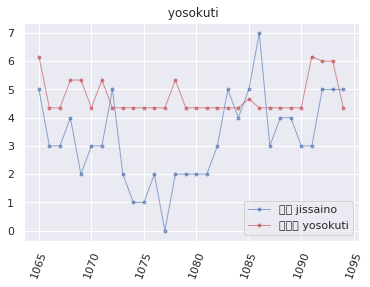

------------------------------------------------------------
accuracy: 0.03333333333333333


,importance
0,227877
1,0
2,0
3,0
4,0
5,0
6,0


------------------------------------------------------------
accuracy: 0.03333333333333333


,importance
0,227877
1,0
2,0
3,0
4,0
5,0
6,0


In [21]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

 
# データフレームの各列を正規化
wine2 = dtt.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
wine2.head()
 

# 説明変数に "quality (kokyuukiスコア以外すべて)" を利用
wine2_except_quality = wine2.drop('sirinnji', axis=1)
X = wine2_except_quality.values
 
# 目的変数に "quality (品質スコア)" を利用
Y = df['sirinnji'].values
 

print("------------------------------------------------------------")


#説明変数入力用

p1 = df['total-teiki'].values
p2 = df['R1-AR1'].values
p3 = df['sinndennzu'].values
p4 = df['fukukuukyou'].values
p5 = df['man'].values
#正規化後説明変数入力用
s1 = wine2['total'].values
s2 = wine2['man'].values
s3 = wine2['woman'].values
s4 = wine2['sinndennzu'].values
s5 = wine2['kokyuuki'].values


## 当日の株価を予測するために必要な過去の日数
lookback = 7

## 訓練・検証・テスト用データを作成
## 過去30日分の株価より当日の株価とする
def data_split(data,start,end,lookback,h1,h2,h3):
    length = abs(start-end)
    X = np.zeros((length, lookback))
    y = np.zeros(length, )
    
    for i in range(length):
        j = start - lookback + i
        k = j + lookback  
        X[i] = h1[k]
        X[:,[1]]=h2[k]
        X[:,[2]]=h3[k]
        y[i] = targetk[k]

    return X, y

print("------------------------------------------------------------")

## 訓練・検証・テスト用データ
(X_train, y_train) = data_split(dtt, -400, -160, lookback,s1,s2,s3)
(X_valid, y_valid) = data_split(dtt, -160, -31, lookback,s1,s2,s3)
(X_test, y_test) = data_split(dtt, -30, 0, lookback,s1,s2,s3)


from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression


from sklearn import svm  
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from sklearn.metrics import r2_score



# 学習する
model = lgb.train(params,
                  lgb_train,
                  num_boost_round=50,
                  valid_sets=lgb_eval)

lgb_params = {
   'reg_lambda': 0.0,
   'reg_alpha': 0.0,
   'num_leaves': 600,
   'n_estimators': 30000,
   'min_data_leaf': 50,
   'learning_rate': 0.025,
   'bagging_fraction': 0.8,
            }

lgb_model = lgb.LGBMRegressor(**lgb_params)

# 上記のパラメータでモデルを学習する

# 学習用のデータと結果を学習する,fit(X_train:学習データ, learn_label:答えデータ)
lgb_model.fit(X_train, y_train)
# テストデータによる予測,lightgbmでX_testを予想：predictした値をY_predとする
Y_pred = lgb_model.predict(X_test)


lgb.LGBMClassifier()
#「LGBMClassifier」のクラスを呼び出して、ハイパーパラメータの初期値を確認

# テストデータによる予測,lightgbmでX_testを予想：predictした値をY_predとする
Y_pred = lgb_model.predict(X_test)

# テスト結果を評価する,accuracy_score()
print("予測対象：", y_test, ", 予測結果→", Y_pred)

from sklearn.metrics import mean_absolute_error
print("平均絶対誤差 (MAE, Mean Absolute Error") 
print(mean_absolute_error(y_test, Y_pred))

## RMSEの計算
print("二乗平均平方根誤差（RMSE） : %.3f" %  
       np.sqrt(mean_squared_error(y_test,Y_pred)))

## test_r2_score計算
test_r2_score = r2_score(y_test,Y_pred)
print("test_r2_score")
print(test_r2_score)

## 予測結果をプロット
pre_date = df.index[-len(y_test):].values
plt.title(" yosokuti")
plt.plot(pre_date, y_test, 'b', alpha=0.6, marker='.', label="実際 jissaino  ", linewidth=1)
plt.plot(pre_date, Y_pred, 'r', alpha=0.6, marker='.', label="予測値 yosokuti", linewidth=1)
plt.xticks(rotation=70)
plt.legend()
plt.grid(True)
plt.show()

print("------------------------------------------------------------")

import lightgbm as lgb

# データを格納する
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# 学習条件を設定
params = {   'reg_lambda': 0.0,
   'reg_alpha': 0.0,
   'num_leaves': 600,
   'n_estimators': 30000,
   'min_data_leaf': 50,
   'learning_rate': 0.025,
   'bagging_fraction': 0.8,}

# 学習する
model = lgb.train(params,
                  lgb_train,
                  valid_sets=lgb_eval)
# テストデータで予測する
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
y_pred_max = np.argmax(y_pred)

# Accuracy を計算する
accuracy = sum(y_test == y_pred_max) / len(y_test)
print('accuracy:', accuracy)

# importanceを表示する
importance = pd.DataFrame(model.feature_importance(), columns=['importance'])
display(importance)

print("------------------------------------------------------------")

# データを格納する
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# 学習条件を設定
params = {   'reg_lambda': 0.0,
   'reg_alpha': 0.0,
   'num_leaves': 600,
   'n_estimators': 30000,
   'min_data_leaf': 50,
   'learning_rate': 0.025,
   'bagging_fraction': 0.8,}

# 学習する
model = lgb.train(params,
                  lgb_train,
                  valid_sets=lgb_eval)
# テストデータで予測する
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
y_pred_max = np.argmax(y_pred)

# Accuracy を計算する
accuracy = sum(y_test == y_pred_max) / len(y_test)
print('accuracy:', accuracy)

# importanceを表示する
importance = pd.DataFrame(model.feature_importance(), columns=['importance'])
display(importance)



------------------------------------------------------------
Test set score: 0.08527131782945736
Cross-Validation scores: [0.23076923 0.30769231 0.42307692 0.30769231 0.36      ]
Average score: 0.3258461538461539
------------------------------------------------------------
test_score : -0.8518564772461452
best_params : {'bagging_fraction': 1.0, 'learning_rate': 0.1, 'max_bin': 100, 'max_depth': -1, 'min_data_leaf': 10, 'n_estimators': 10, 'num_iterations': 200, 'num_leaves': 5}


,param_max_depth,param_n_estimators
0,-1,10
1,-1,10
2,-1,10
3,-1,10
4,-1,10
...,...,...
2425,-0.2,100
2426,-0.2,100
2427,-0.2,100
2428,-0.2,100


None

予測対象： [5. 3. 3. 4. 2. 3. 3. 5. 2. 1. 1. 2. 0. 2. 2. 2. 2. 3. 5. 4. 5. 7. 3. 4.
 4. 3. 3. 5. 5. 5.] , 予測結果→ [5.75938991 4.41917833 4.41917833 5.33345695 5.33345695 4.41917833
 5.33345695 4.41917833 4.41917833 4.41917833 4.41917833 4.41917833
 4.41917833 5.33345695 4.41917833 4.41917833 4.41917833 4.41917833
 4.41917833 4.41917833 5.18751222 4.41917833 4.41917833 4.41917833
 4.41917833 4.41917833 5.60527323 5.19963036 5.19963036 4.41917833]
平均絶対誤差 (MAE, Mean Absolute Error
1.7244860711750962
二乗平均平方根誤差（RMSE） : 2.077
test_r2_score
-0.8518564772461452


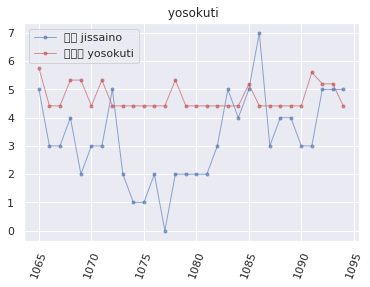

In [22]:
print("------------------------------------------------------------")

# 必要なライブラリの import
from sklearn.linear_model import LogisticRegression


# training set を用いて学習
logreg = LogisticRegression().fit(X_train, y_train)

# test set を用いて評価
score = logreg.score(X_valid, y_valid)
print('Test set score: {}'.format(score))

from sklearn.model_selection import cross_val_score
logreg = LogisticRegression()

# 交差検証
scores = cross_val_score(logreg,X_valid, y_valid, cv=5)

# 各分割におけるスコア
print('Cross-Validation scores: {}'.format(scores))

# スコアの平均値
import numpy as np
print('Average score: {}'.format(np.mean(scores)))
print("------------------------------------------------------------")

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# 探索したハイパーパラメータ
def lgb_params2():
   ret = {
   'num_leaves':[10,5,3],
   'max_depth':[-1,-0.5,-0.2],
   'max_bin':[10,50,100,200,255],
   'n_estimators':[10,50,100],
   'min_data_leaf': [10,5,3],
   'learning_rate': [0.1,0.01],
   'num_iterations': [200,300,400],
   'bagging_fraction':[1.0],
   }
   return ret

grid_search = GridSearchCV(lgb.LGBMRegressor(), lgb_params2(), cv=5)

grid_search.fit(X_train, y_train)


print('test_score : {}'.format(grid_search.score(X_test, y_test)))
print('best_params : {}'.format(grid_search.best_params_))

lgb_model = lgb.LGBMRegressor(**grid_search.best_params_)

# 上記のパラメータでモデルを学習する

# 学習用のデータと結果を学習する,fit(X_train:学習データ, learn_label:答えデータ)
lgb_model.fit(X_train, y_train)



# 各パラメータのCV平均スコア
display(display(pd.DataFrame(grid_search.cv_results_)\
       [['param_max_depth', 'param_n_estimators']]))
# テストデータによる予測,lightgbmでX_testを予想：predictした値をY_predとする
Y_pred = lgb_model.predict(X_test)


lgb.LGBMClassifier()
#「LGBMClassifier」のクラスを呼び出して、ハイパーパラメータの初期値を確認

# テストデータによる予測,lightgbmでX_testを予想：predictした値をY_predとする
Y_pred = lgb_model.predict(X_test)

# テスト結果を評価する,accuracy_score()
print("予測対象：", y_test, ", 予測結果→", Y_pred)

from sklearn.metrics import mean_absolute_error
print("平均絶対誤差 (MAE, Mean Absolute Error") 
print(mean_absolute_error(y_test, Y_pred))

## RMSEの計算
print("二乗平均平方根誤差（RMSE） : %.3f" %  
       np.sqrt(mean_squared_error(y_test,Y_pred)))

## test_r2_score計算
test_r2_score = r2_score(y_test,Y_pred)
print("test_r2_score")
print(test_r2_score)

## 予測結果をプロット
pre_date = df.index[-len(y_test):].values
plt.title(" yosokuti")
plt.plot(pre_date, y_test, 'b', alpha=0.6, marker='.', label="実際 jissaino  ", linewidth=1)
plt.plot(pre_date, Y_pred, 'r', alpha=0.6, marker='.', label="予測値 yosokuti", linewidth=1)
plt.xticks(rotation=70)
plt.legend()
plt.grid(True)
plt.show()




In [23]:

# 探索したハイパーパラメータ
def lgb_params2():
   ret = {
   'num_leaves':[5.5,5,5.4],
   'max_depth':[-1,-0.9,-1.1],
   'max_bin':[80,90,100,110,120],
   'n_estimators':[8,10,15],
   'min_data_leaf': [9,10,11,12,13],
   'learning_rate': [0.1,0.09,0.08,0.07,0.06],
   'num_iterations': [200,300,400],
   'bagging_fraction':[1.0],
   }
   return ret

grid_search = GridSearchCV(lgb.LGBMRegressor(), lgb_params2(), cv=5)

grid_search.fit(X_train, y_train)


print('test_score : {}'.format(grid_search.score(X_test, y_test)))
print('best_params : {}'.format(grid_search.best_params_))


test_score : -0.860540183167118
best_params : {'bagging_fraction': 1.0, 'learning_rate': 0.09, 'max_bin': 80, 'max_depth': -1, 'min_data_leaf': 9, 'n_estimators': 8, 'num_iterations': 200, 'num_leaves': 5}


test_score : -0.2548135842067718
best_params : {'bagging_fraction': 1.0, 'learning_rate': 0.09, 'max_bin': 80, 'max_depth': -1, 'min_data_leaf': 9, 'n_estimators': 8, 'num_iterations': 200, 'num_leaves': 5}


,param_max_depth,param_n_estimators
0,-1,8
1,-1,8
2,-1,8
3,-1,8
4,-1,8
...,...,...
10120,-1.1,15
10121,-1.1,15
10122,-1.1,15
10123,-1.1,15


None

予測対象： [5. 7. 3. 4. 4. 3. 3. 5. 5. 5.] , 予測結果→ [5.21389176 4.43018416 4.43018416 4.43018416 4.43018416 4.43018416
 5.55782187 5.21389176 5.21389176 4.43018416]
平均絶対誤差 (MAE, Mean Absolute Error
1.005986546100416
二乗平均平方根誤差（RMSE） : 1.344
test_r2_score
-0.2548135842067718


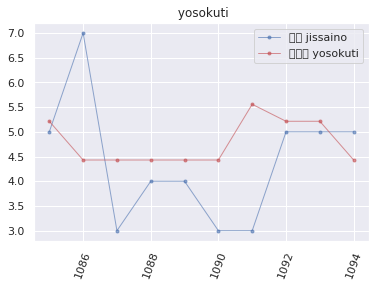

In [0]:

print('test_score : {}'.format(grid_search.score(X_test, y_test)))
print('best_params : {}'.format(grid_search.best_params_))


lgb_model = lgb.LGBMRegressor(**grid_search.best_params_)

# 上記のパラメータでモデルを学習する

# 学習用のデータと結果を学習する,fit(X_train:学習データ, learn_label:答えデータ)
lgb_model.fit(X_train, y_train)



# 各パラメータのCV平均スコア
display(display(pd.DataFrame(grid_search.cv_results_)\
       [['param_max_depth', 'param_n_estimators']]))
# テストデータによる予測,lightgbmでX_testを予想：predictした値をY_predとする
Y_pred = lgb_model.predict(X_test)


lgb.LGBMClassifier()
#「LGBMClassifier」のクラスを呼び出して、ハイパーパラメータの初期値を確認

# テストデータによる予測,lightgbmでX_testを予想：predictした値をY_predとする
Y_pred = lgb_model.predict(X_test)

# テスト結果を評価する,accuracy_score()
print("予測対象：", y_test, ", 予測結果→", Y_pred)

from sklearn.metrics import mean_absolute_error
print("平均絶対誤差 (MAE, Mean Absolute Error") 
print(mean_absolute_error(y_test, Y_pred))

## RMSEの計算
print("二乗平均平方根誤差（RMSE） : %.3f" %  
       np.sqrt(mean_squared_error(y_test,Y_pred)))

## test_r2_score計算
test_r2_score = r2_score(y_test,Y_pred)
print("test_r2_score")
print(test_r2_score)

## 予測結果をプロット
pre_date = df.index[-len(y_test):].values
plt.title(" yosokuti")
plt.plot(pre_date, y_test, 'b', alpha=0.6, marker='.', label="実際 jissaino  ", linewidth=1)
plt.plot(pre_date, Y_pred, 'r', alpha=0.6, marker='.', label="予測値 yosokuti", linewidth=1)
plt.xticks(rotation=70)
plt.legend()
plt.grid(True)
plt.show()

